# Predicting Wine Quality
In this project, we attempt to use a number of quantitative measures to predict judged wine quality. In order to do so, we use a number of different statistical models and visualizations to understand and interpret the data as well as analyze the performance of these models.

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('data/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Visualizing Our Parameters

By constructing single-variable plots of our data, we can gain a greater understanding of the range, distribution, and skew of the various predictor metrics we have available, and also of our target parameter, wine quality. For instance, we can see that many more wines receive scores of 5 or 6 than any other score.

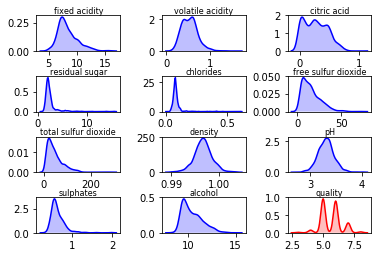

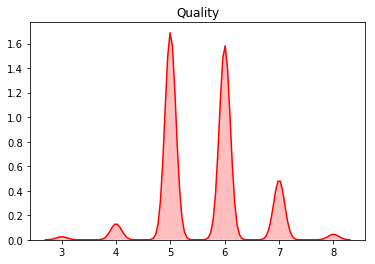

In [150]:
i = 0
font = {'fontsize': 8 }
for key in data:
    i+= 1
    plt.subplot(4,3,i)
    if key == 'quality':
        c = 'r'
    else:
        c = 'b'
    density = sns.kdeplot(data[key], shade=True, legend=False, color=c)
    plt.title(key, font, pad=2) # Format titles

plt.subplots_adjust(wspace=0.5, hspace=0.7) # Set margins for subplots
plt.show()

density = sns.kdeplot(data['quality'], shade=True, legend=False, bw=.1, color='r')
plt.title("Quality")
plt.show()

# Categorizing Data
In the dataset, quality is given as a score on a 1-10 scale. However, in order to train a model to predict and categorize this data, it makes sense to define our own, more general categories that allow the model to make more useful predictions. In essence, instead of expecting the model to exactly predict which score a particular wine receives, we expect it to make an approximate prediction of whether the wine will be good, bad, or mediocre. In addition, this means that when scoring our model, it doesn't need to get the score precisely correct - it gets credit for being within some margin of error represented by the size of the category.

This data recategorization also acts as a measure to prevent overfitting our data; by generalizing our target, we ensure that the model doesn't try to be too specific.

To this end, we parse the quality column into three categories as shown:

| Quality score | Category |
|---|---|
| 1-4 | Low |
| 5-6 | Medium |
| 7-10 | High |

The choice of boundaries here is informed by our visualization above - we can see that 5 and 6 are by far the most common scores, so we place them in their own category (medium). The model, then, is being trained to recognize the outliers: exceptionally bad or remarkably good wines.

In [151]:
y=[]
for quality in data['quality']:
    if quality < 4:
        y.append('L')
    elif quality < 7:
        y.append('M')
    else:
        y.append('H')
    #This process assigns 3 categories to the target data instead of the 10-point scale
#X = data.drop("quality", axis=1)

# Selecting Predictors
This dataset provides 11 different metrics that we can use to predict the quality of the wine, a lot for a single model to process. Instead of using all of these, we can instead choose a subset that best predict our target parameter.

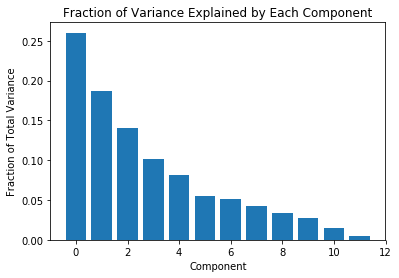

In [152]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

normalized_data = pd.DataFrame(preprocessing.scale(data), columns=data.columns)

pca = PCA().fit(normalized_data)
a = np.arange(12)
plt.bar(a, pca.explained_variance_ratio_)
plt.title('Fraction of Variance Explained by Each Component')
plt.xlabel('Component')
plt.ylabel('Fraction of Total Variance')
plt.show()

In [153]:
components = pd.DataFrame(pca.components_, columns=data.columns)
components

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.487883,-0.265129,0.473335,0.139154,0.197427,-0.045881,0.004067,0.370301,-0.432721,0.254535,-0.073177,0.112489
1,-0.004173,0.338968,-0.137358,0.167736,0.189788,0.259483,0.363971,0.330781,-0.065440,-0.109334,-0.502709,-0.473166
2,-0.164829,-0.227089,0.100229,0.243620,-0.026608,0.616111,0.540732,-0.168723,0.069771,0.212913,0.224971,0.223369
3,-0.231098,0.041858,-0.056736,-0.383038,0.654778,-0.033711,-0.028460,-0.200693,-0.005466,0.560502,-0.091701,-0.036669
4,-0.078779,0.299379,-0.120149,0.709363,0.266237,-0.159413,-0.218453,0.208793,0.257647,0.214835,0.259726,0.137584
5,0.055531,0.297287,0.136633,0.109311,0.337337,-0.042648,0.115954,-0.425667,-0.480354,-0.403743,0.392176,-0.141830
6,-0.307215,-0.626234,0.244149,0.283854,0.230547,-0.138260,-0.110209,-0.122546,0.185692,-0.233402,-0.121719,-0.412388
7,0.200529,0.146126,0.296333,-0.170626,-0.186923,-0.019356,0.089897,0.079500,0.314693,0.275492,0.471189,-0.612247
8,-0.174578,-0.060223,-0.220975,0.278187,-0.419936,-0.318000,0.121823,-0.249074,-0.461916,0.452689,-0.096528,-0.240243
9,-0.182956,0.155106,0.346086,-0.052237,-0.003863,-0.585389,0.589188,0.043538,0.207610,-0.071919,-0.110605,0.260240


Here we use Principle Component Analysis to determine which features contribute least to the variation in our dataset. Once we identify these features, we can use the other parameters to make predictions, since they will likely be the best at predicting one another. We looked for variables that were not strongly correlated with the first two PCA components (which are the important ones) to remove from our dataset, so only important parameters would be included in our predictive model. In the end, we determined residual sugar, free sulfur dioxide, chlorides, and total sulfur dioxide were not important. 

# Logistic Regression Model
A logistic regression attempts to catorize data using a logistic curve, and estimating the probability that a given set of parameters corresponds to each possible target value. In this case, the model attempts to determine the quality of each wine based on a set of 7 parameters that we ruled were somewhat important to important based off of the principal component analysis.

In [154]:
#X = data[['residual sugar','alcohol','free sulfur dioxide']]
data = data.drop('residual sugar', axis = 1)
data = data.drop('free sulfur dioxide', axis = 1)
data = data.drop('chlorides', axis = 1)
data = data.drop('total sulfur dioxide', axis = 1)

X = data.drop("quality", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
logModel = LogisticRegression()
logModel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [155]:
pred_logModel = logModel.predict(X_test)

In [156]:
score = accuracy_score(y_true = y_test, y_pred = pred_logModel)
print("Logistic Regression Model Accuracy: " + str(score))

Logistic Regression Model Accuracy: 0.871875


# K-Nearest Neighbors Algorithm
The KNN algorithm is designed to classify members of dataset into a number of discrete categories. Ideally, a perfect classifier could provide the likelihood that a given observation would fit into each possible category. While this is impossible, most algorithms provide some comparable metric.

The K-Nearest Neighbor Algorithm in particular uses the points nearest to each observation to attempt to predict its classification. The algorithm's name comes from a parameter K which determines how many of these neighbors are used to classify each point.

In [157]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [158]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25)
model = KNeighborsClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
knn_score = accuracy_score(y_test, predictions)
print("KNN score: " + str(knn_score))

KNN score: 0.855


# Decision Tree Classifier
A decision tree classifier uses the data to build a "decision tree" with a series of nodes and edges which act as a flowchart for the algorithm to classify each point. This classifier does not assume a linear correlation in the data set, making it more generally applicable.

Here, we use a Decision Tree Classifier to attempt to classify wines as Low, Medium, or High quality.

In [159]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
decision_tree_score = accuracy_score(y_test, predictions)
print("Decision Tree score: " + str(decision_tree_score))

Decision Tree score: 0.8675


# Examining the KNN Classifier
Here we look to analyze the accuracy of the KNN classifier. The parameter k used by KNN can be tuned to find the best model - generally a very low k results in overfitting, while a very high k will result in underfitting. Consequently, some maximum exists between these extremes where the model is most accurate. 

In [160]:
from sklearn.metrics import accuracy_score

accuracy = knn_score
print('accuracy:', accuracy)

#y_train.describe()
#y_test.describe()
base_array = np.full(400, 'M')

baseline = accuracy_score(y_test, base_array)
print('baseline:',baseline)

improvement = (accuracy - baseline) / baseline
print('improvement',improvement)

accuracy: 0.855
baseline: 0.875
improvement -0.022857142857142878


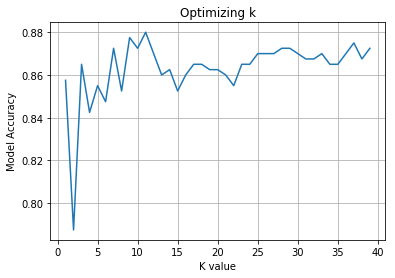

In [161]:
%matplotlib inline
from sklearn.metrics import accuracy_score
accuracy = []
max_k = 40
for k in range(1, max_k):
    model = KNeighborsClassifier(k)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy.append(accuracy_score(predictions, y_test))
    
plt.plot(range(1,max_k),accuracy)
plt.xlabel("K value")
plt.ylabel("Model Accuracy")
plt.title("Optimizing k")
#plt.ylim([0.58, 0.70])
#plt.xticks(range(1,31,2),range(1,31,2))
plt.grid()

Here, a number of factors are at play. Most obviously, because so much of the data clumps at 5 and 6, in the "Medium" category, the baseline (assuming that all wines are of "Medium" quality) performs exceptionally well, with an accuracy of 87.5%. As a result, most solutions generated by the model tend to overfit when compared to this solution, resulting in lower scores. In essence, because the simplest solution is so accurate, any more complex model seems to "overthink" the prediction in comparison.

This is most clear in the plot shown - we have established that as k increases, broadening the algorithm's scope, it tends to underfit the data. In this chart, it becomes clear that the algorithm's accuracy generally increases with k; as its solution becomes more general, it aproaches the baseline accuracy of 87.5%. This demonstrates the core issue - that the simple solution is so effective that it outperforms any more nuanced prediction algorithm.

# Reclassifying Data
By reclassifying the data into two categories, High and Low, we can separate the predominant 5 and 6 scores into separate categories, and ensure that no single category contains too much of the data. In doing so, the baseline classifier is only 50% effective, and the more complex KNN classifier has the chance to be much more effective.

In [162]:
y_2=[]
for quality in data['quality']:
    if quality <= 5:
        y_2.append('L')
    elif quality >= 6:
        y_2.append('H')

x_train, x_test, y_train, y_test = train_test_split(X, y_2, test_size=0.25)

In [163]:
base_array = np.full(400, 'L')
baseline = accuracy_score(y_test, base_array)
print('baseline:',baseline)

baseline: 0.4675


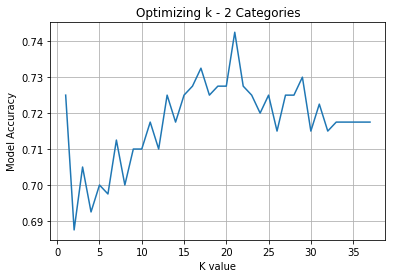

In [164]:
%matplotlib inline
from sklearn.metrics import accuracy_score
accuracy = []
max_k = 38
for k in range(1, max_k):
    model = KNeighborsClassifier(k)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy.append(accuracy_score(predictions, y_test))
    
plt.plot(range(1,max_k),accuracy)
plt.title("Optimizing k - 2 Categories")
plt.xlabel("K value")
plt.ylabel("Model Accuracy")
plt.grid()

Looking at the same visualization done with our two-category classifier, we can see that the KNN classifier is much more effective now that the data is more evenly spread between the categories. With only two classes, our model no longer skews toward simplicity - a more nuanced approach is necessary. In this case, we prefer a k-value of 21, where the model accuracy is greatest.